# Linear vs. Logistic Regression for Classification

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression, LogisticRegression

# nice parameters for matplotlib
import matplotlib as mpl
mpl.rcParams["figure.figsize"] = [8.0, 6.0]
mpl.rcParams["legend.fontsize"] = "large"
mpl.rcParams["figure.titlesize"] = "medium"

## Function to Plot the Decision Boundary of a Linear Model

Notice that since the both the linear and logistic regression models learn linear decision boundaries, the code for finding the decision boundaries is the same (modulo how scipy handles the intercept in both cases). The difference is in the way the two models are trained and the nonlinearities used. Those differences alone make logistic regression robust against influential points on the correct side of the decision boundary.

In [2]:
def plot_linear_decision_boundary(model, X, y, title):
    """Code adapted from:
    https://scipython.com/blog/plotting-the-decision-boundary-of-a-logistic-regression-model/
    """
    model.fit(X, y)
    
    # Retrieve the model parameters.
    if isinstance(model, LogisticRegression):
        b = model.intercept_[0]
    elif isinstance(model, LinearRegression):
        b = model.intercept_
    else:
        raise ValueError(f"Cannot make plot with model: {model}")
    
    w1, w2 = model.coef_.T
    # Calculate the intercept and gradient of the decision boundary.
    c = -b/w2
    m = -w1/w2

    # Plot the data and the classification with the decision boundary.
    plt.title(title)
    xmin, xmax = -3, 6
    ymin, ymax = -21, 11
    xd = np.array([xmin, xmax])
    yd = m*xd + c
    plt.plot(xd, yd, 'k', lw=1, ls='--')
    plt.fill_between(xd, yd, ymin, color='tab:orange', alpha=0.2)
    plt.fill_between(xd, yd, ymax, color='tab:blue', alpha=0.2)

    plt.scatter(*X[y==-1].T, s=8, alpha=1)
    plt.scatter(*X[y==1].T, s=8, alpha=1)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.ylabel(r'$x_2$')
    plt.xlabel(r'$x_1$')

    plt.show()

## Data

In [3]:
blob_0 = stats.multivariate_normal.rvs(mean=[0, 7.5], cov=1, size=50)
blob_1 = stats.multivariate_normal.rvs(mean=[0, -7.5], cov=1, size=50)
blob_2 = stats.multivariate_normal.rvs(mean=[4, -20], cov=0.25, size=20)

X, y = np.vstack((blob_0, blob_1)), np.array([-1 for _ in range(50)] + [1 for _ in range(50)])
X2, y2 = np.vstack((blob_0, blob_1, blob_2)), np.array([-1 for _ in range(50)] + [1 for _ in range(50 + 20)])

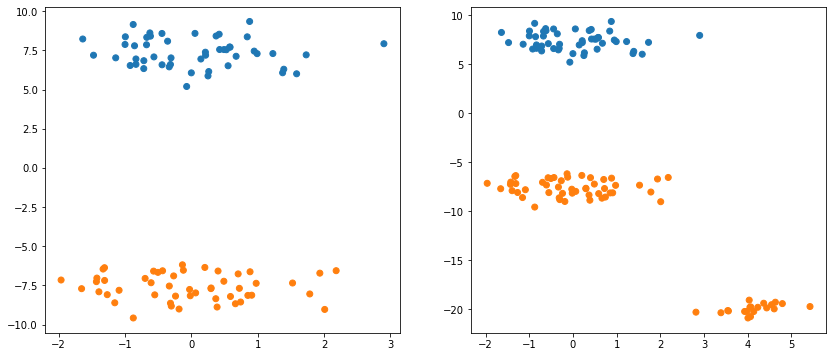

In [4]:
cmap = lambda yi: "tab:blue" if yi == -1 else "tab:orange"

plt.figure(figsize=(14, 6))
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], color=list(map(cmap, y)))

plt.subplot(122)
plt.scatter(X2[:, 0], X2[:, 1], color=list(map(cmap, y2)))
plt.show()

## Logistic Regression

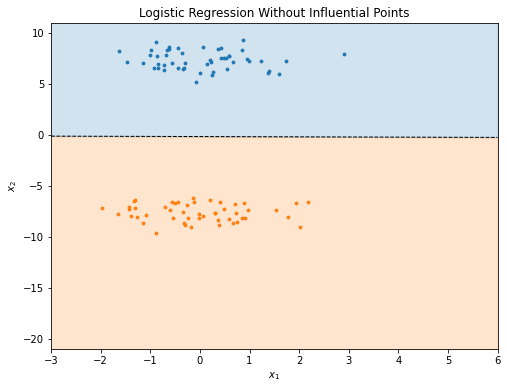

In [5]:
plot_linear_decision_boundary(LogisticRegression(), X, y, "Logistic Regression Without Influential Points")

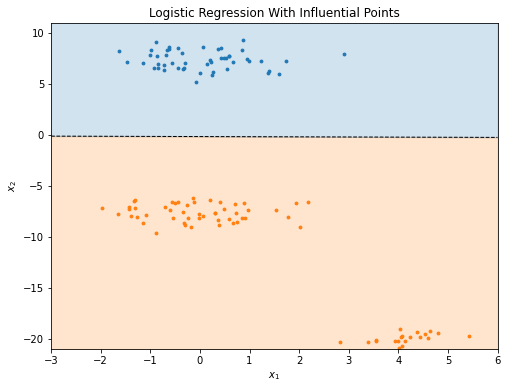

In [6]:
plot_linear_decision_boundary(LogisticRegression(), X2, y2, "Logistic Regression With Influential Points")

## Linear Regression

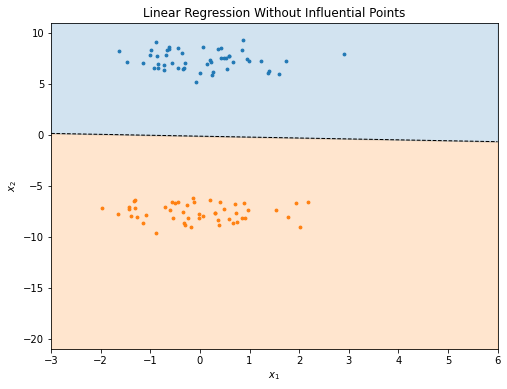

In [7]:
plot_linear_decision_boundary(LinearRegression(), X, y, "Linear Regression Without Influential Points")

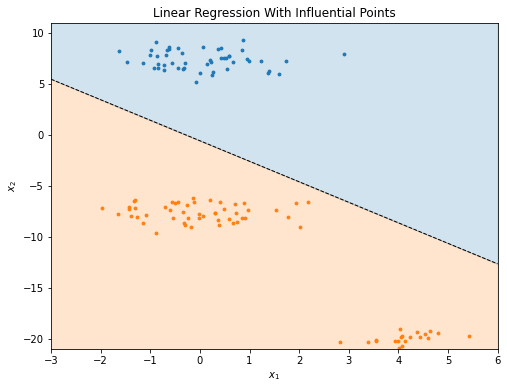

In [8]:
plot_linear_decision_boundary(LinearRegression(), X2, y2, "Linear Regression With Influential Points")